# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Problem Statement

In [2]:
# Target Column = "insuranceclaim"(Binary Classification)

# 2.Data Gathering

In [3]:
df=pd.read_csv(r"C:\Users\sanskriti\S.python\Project ML\insuranceclaim.csv")
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


# 3.EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [5]:
df.shape

(1338, 8)

In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


<Axes: >

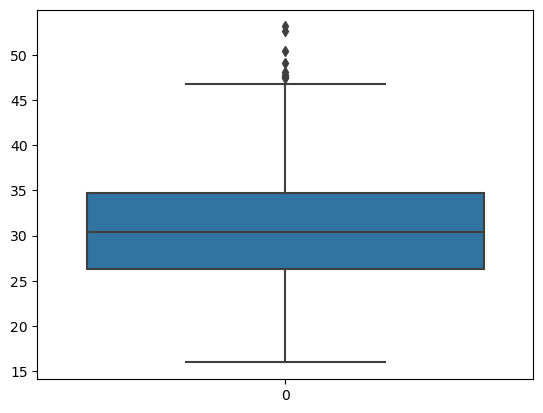

In [7]:
sns.boxplot(df["bmi"])

<Axes: xlabel='insuranceclaim', ylabel='count'>

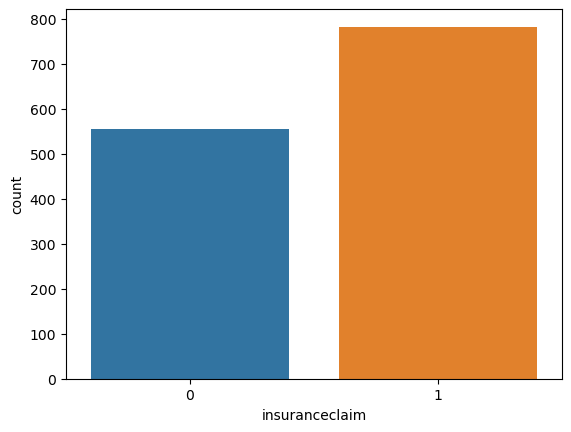

In [8]:
sns.countplot(x=df["insuranceclaim"])

<Axes: xlabel='bmi', ylabel='Count'>

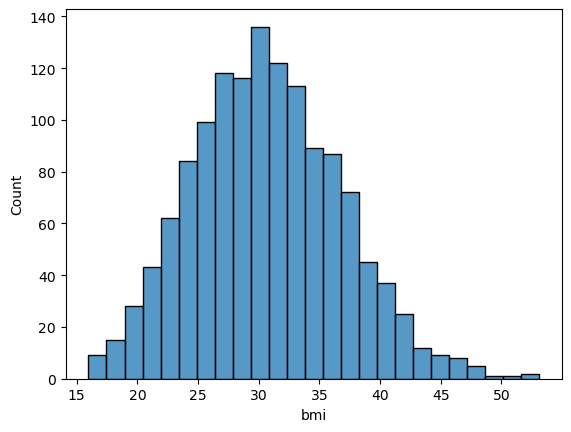

In [9]:
sns.histplot(df["bmi"])

<Axes: >

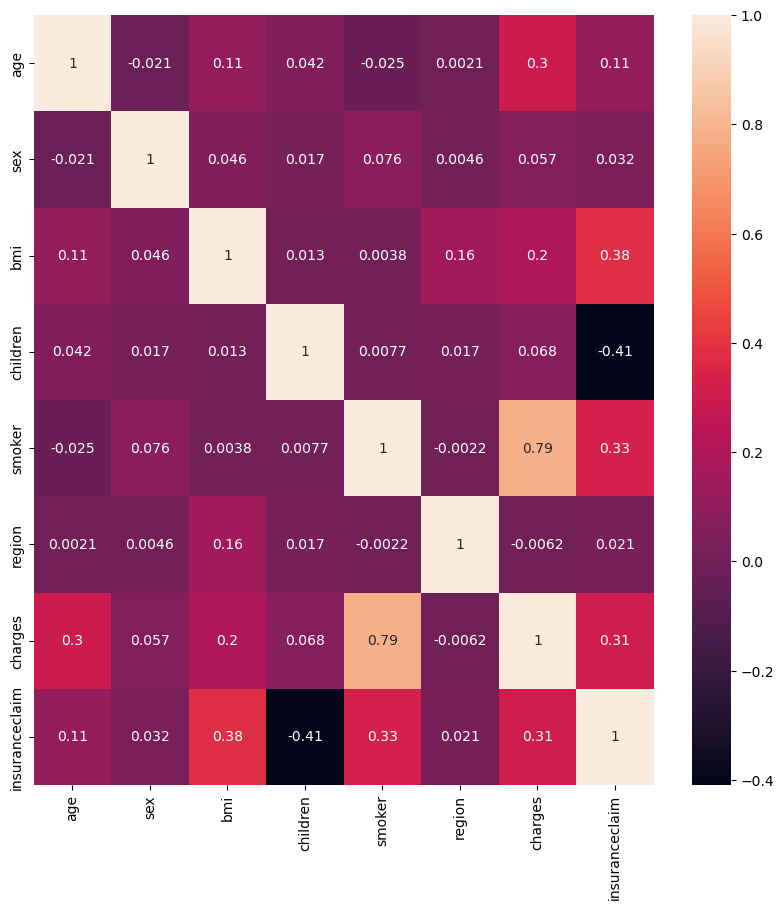

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

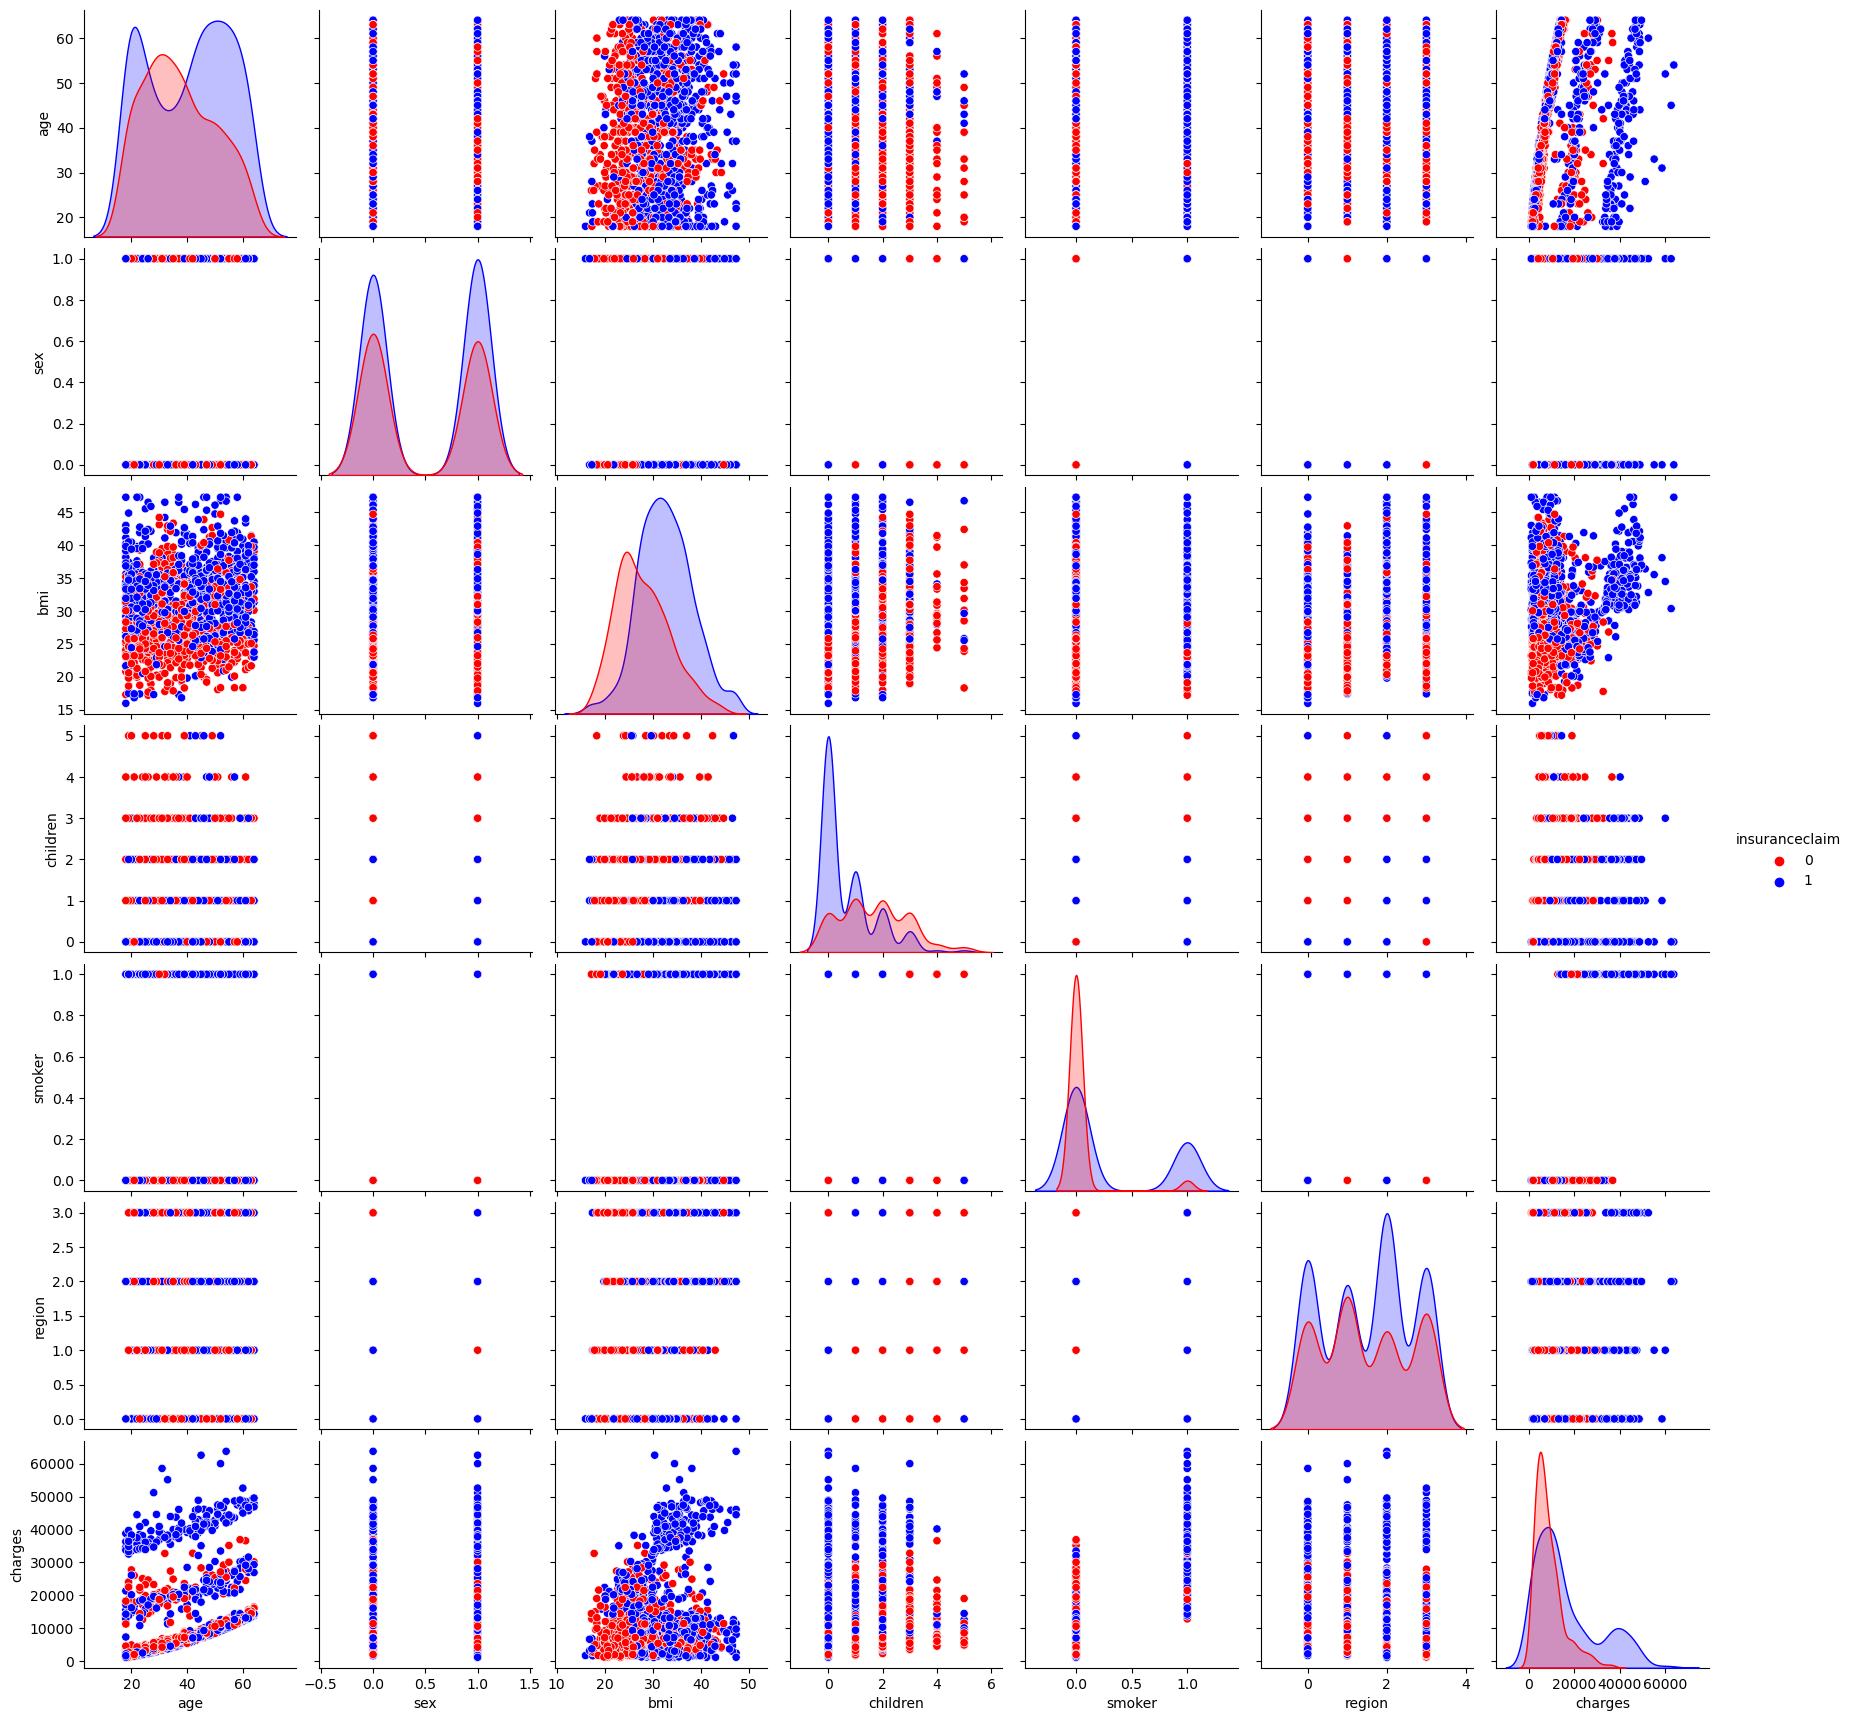

In [82]:
import warnings
custom_palette = ["Red", "blue", "green"]
warnings.filterwarnings("ignore")
sns.pairplot(df,hue="insuranceclaim",palette=custom_palette)



In [12]:
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)

iqr = q3-q1

upper_tail = q3+1.5*iqr
lower_tail = q1-1.5*iqr

In [13]:
upper_tail

47.290000000000006

In [14]:
lower_tail

13.7

### Checking Outliers

In [15]:
def outliers(n):

    q1 = np.percentile(n,25)
    q3 = np.percentile(n,75)

    iqr = q3 - q1

    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    

    outliers = [i for i in n if i < lower_tail or i > upper_tail]
    return outliers

In [16]:
n=df["bmi"]
outliers(n)

[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]

In [17]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [18]:
df["insuranceclaim"].unique()

array([1, 0], dtype=int64)

# 4.Feature Engineering

### Handling outliers

In [19]:
def find_iqr(df,n):
    q1=df[n].quantile(0.25)
    q3=df[n].quantile(0.75)
    iqr=q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    print(lower_tail)
    print(upper_tail)
    df[n]=df[n].apply(lambda x: upper_tail if x>upper_tail else(lower_tail if x<lower_tail else x))
n="bmi"
find_iqr(df,n)

13.7
47.290000000000006


In [20]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_array = std.fit_transform(df.iloc[:,:7])
df1 = pd.DataFrame(std_array)
df1

,0,1,2,3,4,5,6
0,-1.438764,-1.010519,-0.454201,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.515300,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.388125,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.312218,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292342,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.052846,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.509965,-1.010519,0.209750,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.509965,-1.010519,1.023999,-0.908614,-0.507463,0.438495,-0.961596
1336,-1.296362,-1.010519,-0.801041,-0.908614,-0.507463,1.343905,-0.930362


In [21]:
df.shape

(1338, 8)

In [22]:
x=df1
y=df["insuranceclaim"]
x

,0,1,2,3,4,5,6
0,-1.438764,-1.010519,-0.454201,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.515300,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.388125,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.312218,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292342,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.052846,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.509965,-1.010519,0.209750,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.509965,-1.010519,1.023999,-0.908614,-0.507463,0.438495,-0.961596
1336,-1.296362,-1.010519,-0.801041,-0.908614,-0.507463,1.343905,-0.930362


In [23]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

# 5.Model Training

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y) 

In [25]:
log_clf=LogisticRegression()
log_clf_model=log_clf.fit(xtrain,ytrain)
log_clf_model

LogisticRegression()

# 6.Model Evaluation

In [26]:
ytrain_predict=log_clf_model.predict(xtrain) # training

In [27]:
accuracy = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy : {accuracy}")
print("*"*55)

conf_matrix = confusion_matrix(ytrain,ytrain_predict)
print(conf_matrix)
print("*"*55)

class_report = classification_report(ytrain,ytrain_predict)
print(class_report)
print("*"*55)

Accuracy : 0.8897196261682243
*******************************************************
[[381  63]
 [ 55 571]]
*******************************************************
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       444
           1       0.90      0.91      0.91       626

    accuracy                           0.89      1070
   macro avg       0.89      0.89      0.89      1070
weighted avg       0.89      0.89      0.89      1070

*******************************************************


In [28]:
ytest_predict=log_clf_model.predict(xtest) # On testing

In [29]:
accuracy = accuracy_score(ytest,ytest_predict)
print(f"Accuracy : {accuracy}")
print("*"*55)

conf_matrix = confusion_matrix(ytest,ytest_predict)
print(conf_matrix)
print("*"*55)

class_report = classification_report(ytest,ytest_predict)
print(class_report)
print("*"*55)

Accuracy : 0.8768656716417911
*******************************************************
[[ 91  20]
 [ 13 144]]
*******************************************************
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       111
           1       0.88      0.92      0.90       157

    accuracy                           0.88       268
   macro avg       0.88      0.87      0.87       268
weighted avg       0.88      0.88      0.88       268

*******************************************************


# Decision Tree

In [30]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [31]:
dt_model=dt.fit(xtrain,ytrain)
dt_model

DecisionTreeClassifier()

In [32]:
ytrain_predict1=dt_model.predict(xtrain) # on training

In [33]:
accuracy = accuracy_score(ytrain,ytrain_predict1)
print(f"Accuracy : {accuracy}")
print("*"*55)

conf_matrix = confusion_matrix(ytrain,ytrain_predict1)
print(conf_matrix)
print("*"*55)

class_report = classification_report(ytrain,ytrain_predict1)
print(class_report)
print("*"*55)

Accuracy : 1.0
*******************************************************
[[444   0]
 [  0 626]]
*******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       1.00      1.00      1.00       626

    accuracy                           1.00      1070
   macro avg       1.00      1.00      1.00      1070
weighted avg       1.00      1.00      1.00      1070

*******************************************************


In [34]:
ytest_predict1=dt_model.predict(xtest)

In [35]:
accuracy = accuracy_score(ytest,ytest_predict1)
print(f"Accuracy : {accuracy}")
print("*"*55)

conf_matrix = confusion_matrix(ytest,ytest_predict1)
print(conf_matrix)
print("*"*55)

class_report = classification_report(ytest,ytest_predict1)
print(class_report)
print("*"*55)

Accuracy : 0.9514925373134329
*******************************************************
[[103   8]
 [  5 152]]
*******************************************************
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       111
           1       0.95      0.97      0.96       157

    accuracy                           0.95       268
   macro avg       0.95      0.95      0.95       268
weighted avg       0.95      0.95      0.95       268

*******************************************************


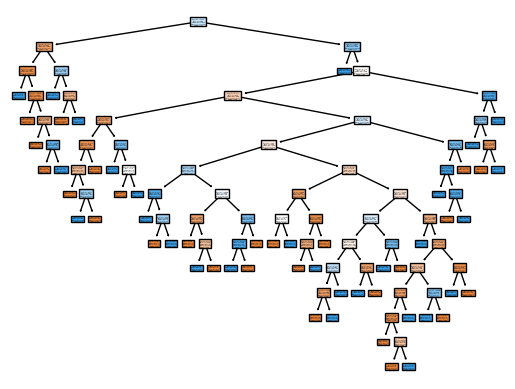

In [36]:
dt_plot=plot_tree(dt_model,class_names=["Yes","No"],filled=True)

## Decision Tree hyperparameters

In [37]:
hyperparameters={"criterion":["entropy","gini"],
                "max_depth":np.arange(1,10),
                "min_samples_split":np.arange(2,10),
                "min_samples_leaf":np.arange(2,10),}

In [38]:
random_search_model=RandomizedSearchCV(dt_model,hyperparameters,error_score="raise",cv=5)
random_search_model

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [39]:
random_search_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [40]:
random_search_model.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=8)

In [41]:
hyp_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=13)

In [42]:
hyp_dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=13)

In [43]:
ypred_train = hyp_dt_model.predict(xtrain)

Accuracy = 0.8429906542056075
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       444
           1       0.99      0.74      0.85       626

    accuracy                           0.84      1070
   macro avg       0.86      0.86      0.84      1070
weighted avg       0.88      0.84      0.84      1070

Axes(0.125,0.11;0.62x0.77)


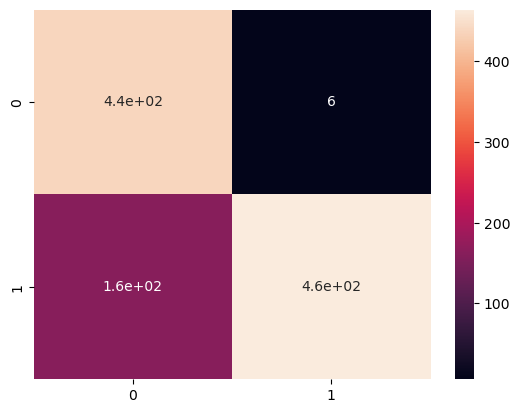

In [44]:
#Testing
print(f"Accuracy = {accuracy_score(ytrain,ypred_train)}")
print(classification_report(ytrain,ypred_train))
print(sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True))

In [45]:
ypred_test = hyp_dt_model.predict(xtest)


In [46]:

print(f"Accuracy = {accuracy_score(ytest,ypred_test)}")
print(confusion_matrix(ytest,ypred_test))
print(classification_report(ypred_test,ytest))

Accuracy = 0.8432835820895522
[[110   1]
 [ 41 116]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       151
           1       0.74      0.99      0.85       117

    accuracy                           0.84       268
   macro avg       0.86      0.86      0.84       268
weighted avg       0.88      0.84      0.84       268



# Random Forest

In [47]:
rf_clf = RandomForestClassifier()

In [48]:
rf_clf_model = rf_clf.fit(xtrain,ytrain)

In [49]:
ypred_train1 = rf_clf_model.predict(xtrain)

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       1.00      1.00      1.00       626

    accuracy                           1.00      1070
   macro avg       1.00      1.00      1.00      1070
weighted avg       1.00      1.00      1.00      1070



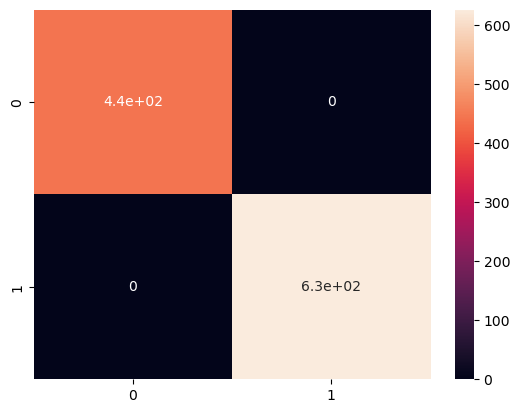

In [50]:
# Training
print("Accuracy = ",accuracy_score(ytrain,ypred_train1))
sns.heatmap(confusion_matrix(ytrain,ypred_train1),annot=True)
print(classification_report(ytrain,ypred_train1))

In [51]:
ypred_test1 = rf_clf_model.predict(xtest)

Accuracy = 0.9626865671641791
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       111
           1       0.96      0.97      0.97       157

    accuracy                           0.96       268
   macro avg       0.96      0.96      0.96       268
weighted avg       0.96      0.96      0.96       268



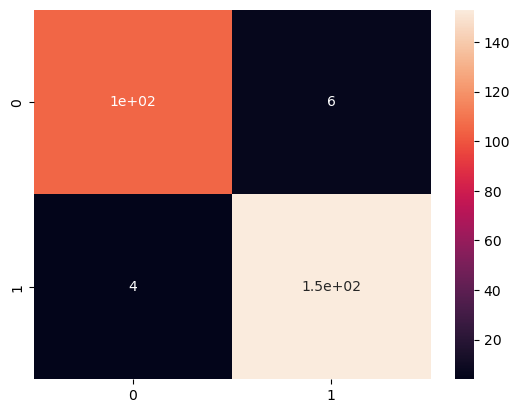

In [52]:
# Testing
print(f"Accuracy = {accuracy_score(ytest,ypred_test1)}")
sns.heatmap(confusion_matrix(ytest,ypred_test1),annot=True)
print(classification_report(ytest,ypred_test1))

### Random forest Hyperparameters

In [53]:

hyp={
   "n_estimators":np.arange(10,200),
    "criterion": ['gini','entropy'],
    "max_depth" : np.arange(5,15),
    "min_samples_split":np.arange(5,20),
    "min_samples_leaf":np.arange(4,15),
    "max_features":['auto']
}

In [54]:
rscv_rf_clf = RandomizedSearchCV(rf_clf_model, hyp, cv = 6)

In [83]:
rscv_rf_clf.fit(xtrain,ytrain)
warnings.filterwarnings("ignore")

In [56]:
rscv_rf_clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=12, max_features='auto',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=23)

In [57]:
rf_clf = RandomForestClassifier(criterion='entropy', max_depth=13, max_features='auto',
                       min_samples_leaf=10, min_samples_split=7,
                       n_estimators=135, random_state=10)
rf_clf

RandomForestClassifier(criterion='entropy', max_depth=13, max_features='auto',
                       min_samples_leaf=10, min_samples_split=7,
                       n_estimators=135, random_state=10)

In [84]:
rf_clf.fit(xtrain,ytrain)
warnings.filterwarnings("ignore")

In [59]:
y_pred_train = rf_clf.predict(xtrain)

In [60]:
# Training
accuracy = accuracy_score(ytrain,y_pred_train)
print(f"Accuracy : {accuracy}")
conf_matrix = confusion_matrix(ytrain,y_pred_train)
print(conf_matrix)
class_report = classification_report(ytrain,y_pred_train)
print(class_report)


Accuracy : 0.9672897196261683
[[428  16]
 [ 19 607]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       444
           1       0.97      0.97      0.97       626

    accuracy                           0.97      1070
   macro avg       0.97      0.97      0.97      1070
weighted avg       0.97      0.97      0.97      1070



In [61]:
y_pred_test = rf_clf.predict(xtest)

In [62]:
# Testing
accuracy = accuracy_score(ytest,y_pred_test)
print(f"Accuracy : {accuracy}")
conf_matrix = confusion_matrix(ytest,y_pred_test)
print(conf_matrix)
class_report = classification_report(ytest,y_pred_test)
print(class_report)

Accuracy : 0.9402985074626866
[[101  10]
 [  6 151]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       111
           1       0.94      0.96      0.95       157

    accuracy                           0.94       268
   macro avg       0.94      0.94      0.94       268
weighted avg       0.94      0.94      0.94       268



# Adaboost

In [63]:
adb_clf = AdaBoostClassifier()
adb_clf

AdaBoostClassifier()

In [64]:
adb_clf_model = adb_clf.fit(xtrain,ytrain)
adb_clf_model

AdaBoostClassifier()

In [65]:
ypred__train1 = adb_clf_model.predict(xtrain)

In [66]:
#Training
accuracy = accuracy_score(ytrain,ypred__train1)
print(f"Accuracy : {accuracy}")
conf_matrix = confusion_matrix(ytrain,ypred__train1)
print(conf_matrix)
class_report = classification_report(ytrain,ypred__train1)
print(class_report)

Accuracy : 0.8897196261682243
[[384  60]
 [ 58 568]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       444
           1       0.90      0.91      0.91       626

    accuracy                           0.89      1070
   macro avg       0.89      0.89      0.89      1070
weighted avg       0.89      0.89      0.89      1070



In [67]:
ypred__test1 = adb_clf_model.predict(xtest)

In [68]:
#Testing
accuracy = accuracy_score(ytest,ypred__test1)
print(f"Accuracy : {accuracy}")
conf_matrix = confusion_matrix(ytest,ypred__test1)
print(conf_matrix)
class_report = classification_report(ytest,ypred__test1)
print(class_report)

Accuracy : 0.8283582089552238
[[ 84  27]
 [ 19 138]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       111
           1       0.84      0.88      0.86       157

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



### AdaBoost hyperparameters

In [69]:

hyp = {
    "n_estimators":np.arange(10,200),
    "max_depth": [None, 10, 20, 30]
}

rscv_adb_clf_model = RandomizedSearchCV(rf_clf_model, hyp, cv = 6)
rscv_adb_clf_model.fit(xtrain,ytrain)
rscv_adb_clf_model.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=157)

In [70]:
adb_clf = AdaBoostClassifier(learning_rate=0.1, n_estimators=36, random_state=10)
adb_clf

AdaBoostClassifier(learning_rate=0.1, n_estimators=36, random_state=10)

In [71]:
adb_clf.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.1, n_estimators=36, random_state=10)

In [72]:
y_pred__train = adb_clf.predict(xtrain)

In [73]:
#Training
accuracy = accuracy_score(ytrain,y_pred__train)
print(f"Accuracy : {accuracy}")
conf_matrix = confusion_matrix(ytrain,y_pred__train)
print(conf_matrix)
class_report = classification_report(ytrain,y_pred__train)
print(class_report)

Accuracy : 0.8411214953271028
[[334 110]
 [ 60 566]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       444
           1       0.84      0.90      0.87       626

    accuracy                           0.84      1070
   macro avg       0.84      0.83      0.83      1070
weighted avg       0.84      0.84      0.84      1070



In [74]:
y_pred__test = adb_clf.predict(xtest)

In [75]:
#Testing
accuracy = accuracy_score(ytest,y_pred__test)
print(f"Accuracy : {accuracy}")
conf_matrix = confusion_matrix(ytest,y_pred__test)
print(conf_matrix)
class_report = classification_report(ytest,y_pred__test)
print(class_report)

Accuracy : 0.7910447761194029
[[ 72  39]
 [ 17 140]]
              precision    recall  f1-score   support

           0       0.81      0.65      0.72       111
           1       0.78      0.89      0.83       157

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [76]:
class logistic_reg():
    def Input(self):
        self.age=float(input("Enter age="))
        self.sex=float(input("Enter sex="))
        self.bmi=float(input("Enter bmi="))
        self.children=float(input("Enter children="))
        self.smoker=float(input("Enter smoker="))
        self.region=float(input("Enter region="))
        self.charges=float(input("Enter charges="))
    def Output(self):
        df=pd.DataFrame([[self.age,self.sex, self.bmi,self.children,self.smoker,self.region,self.charges]],columns=["age","sex","bmi","children","smoker","region","charges"])
        return log_clf_model.predict(df)

In [77]:
obj=logistic_reg()
obj

In [78]:
obj.Input()

Enter age=23
Enter sex=1
Enter bmi=123
Enter children=1
Enter smoker=1
Enter region=12
Enter charges=1234


In [85]:
obj.Output()
warnings.filterwarnings("ignore")